In [40]:
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr','BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r','ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r','Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r','RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r','nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os# Importing the OS for doing systme operation
import pandas as pd #import pandas for data manipulation
import matplotlib.pyplot as ploting # import matplotlib and seaborn #for data visualization
ploting.rc('figure',figsize=(17,13))# Setting The Size of PLOT
import seaborn as sns# Importing the seaborn for data visualissation
import numpy as np# Importing the basic liberary NUMPY
import random# Importing the random
import warnings#importing warnings for ignoring warnings 
warnings.filterwarnings("ignore")#filteringi warings
TRESHOLD_CORR = 0.01 # Setting the Thresold value for correlation matrix 
#for random

Graph Plotting

---



---



In [43]:
def show_count_plot(feature, title, df, size=1, ordered=True):
    ### setting the figure size of the plot
    f, ax = ploting.subplots(1,1, figsize=(4*size,4))
    ### Getting the total lenth of df in float
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:50], palette=random.choice(cmap))
    else:
        g = sns.countplot(df[feature], palette=random.choice(cmap))
        ### Setting the tittle of the plot
    g.set_title(title)
    ## If size given is greater than 2 then the labels automatically gets rotated
    if(size > 2):
      ### Here we are setting the X_ticks
        ploting.xticks(rotation=90, size=8)

    ploting.show() 

In [44]:
from sklearn.metrics import confusion_matrix# Basic liberary for result showing
from sklearn.metrics import classification_report# Basic liberary for model building   
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
import random

def report_generator(y_tst , y_pred , title="Testing" , rnd=2):                                                # defining the report Generation function
    '''here we are generating the function to get the result with random colourised cmap of the confusion matrix'''

    sentiment_classes = ['Negative','Positive']
    print(" ")
    ploting.figure(figsize=(8,6))
    ### for the figure size we are setting the size
    sns.heatmap(confusion_matrix(y_tst, y_pred) ,cmap=random.choice(cmap), fmt = 'd' ,annot = True , xticklabels=sentiment_classes,yticklabels=sentiment_classes)
    ploting.title(f'Confusion matrix {title}', fontsize=16)
    # Setting the tittle of the plot
    ploting.xlabel('Actual label', fontsize=12)
    ### for the plot we are giving the Xlabel
    ploting.ylabel('Predicted label', fontsize=12)
    ### for the plot we are giving the Ylabel
    print(classification_report(y_tst, y_pred))
    ### Generating the classification report
    print(" ")
    ### for the plot we are giving the Accuracy
    accuracy = accuracy_score(y_tst, y_pred)
    ### for the plot we are giving the accuracy
    print("  ")
    print("="*50)
    print(f'{title} Accuracy   : {round(accuracy , rnd)}')
    precision = precision_score(y_tst, y_pred,average='weighted')#estimating precision__score_
    recall = recall_score(y_tst, y_pred,average='weighted')#estimating recall___score
    f1score = f1_score(y_tst, y_pred,average='weighted')#esimaating f1_score
    print(f'{title} precision  : {round(precision , rnd)}')
    print(f'{title} recall     : {round(recall , rnd)}')
    print(f'{title} f1score    : {round(f1score , rnd)}')
    print("="*50)
    print("  ")

Loading the dataset

---



---



This is the code for Unzipping the files containing dataset

In [45]:
# import zipfile

# zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Anoop/archive (1).2.zip", 'r')
# zip_ref.extractall("/content/drive/MyDrive/Anoop/dataset")
# zip_ref.close()

In [46]:
stu_info = pd.read_csv('/content/drive/MyDrive/Anoop/dataset/studentInfo.csv')
cources = pd.read_csv('/content/drive/MyDrive/Anoop/dataset/courses.csv')
student_vle = pd.read_csv('/content/drive/MyDrive/Anoop/dataset/studentVle.csv').iloc[: , :-2]
vle = pd.read_csv('/content/drive/MyDrive/Anoop/dataset/vle.csv').iloc[: , :-2]

In [47]:
print(stu_info.shape, cources.shape , student_vle.shape , vle.shape)

(32593, 12) (22, 3) (10655280, 4) (6364, 4)


In [48]:
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


In [49]:
print(stu_info.columns,"\n", cources.columns ,"\n ", student_vle.columns ,"\n ", vle.columns)

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result'],
      dtype='object') 
 Index(['code_module', 'code_presentation', 'module_presentation_length'], dtype='object') 
  Index(['code_module', 'code_presentation', 'id_student', 'id_site'], dtype='object') 
  Index(['id_site', 'code_module', 'code_presentation', 'activity_type'], dtype='object')


In [50]:
from functools import reduce
data_frames = [stu_info, cources , student_vle , vle]

In [51]:
# Merging Tables
result1 = pd.merge(stu_info, cources, left_on=('code_module','code_presentation'), right_on=('code_module','code_presentation'),how='left', sort=False)

In [52]:
result = pd.merge(result1, student_vle, on=["code_module" , "code_presentation", "id_student"] , how='left')

In [53]:
df = pd.merge(result, vle,  on=["code_module","code_presentation","id_site"] , how='left').groupby('final_result', group_keys=False).apply(lambda x: x.sample(8500))

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34000 entries, 1040375 to 2566879
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 34000 non-null  object 
 1   code_presentation           34000 non-null  object 
 2   id_student                  34000 non-null  int64  
 3   gender                      34000 non-null  object 
 4   region                      34000 non-null  object 
 5   highest_education           34000 non-null  object 
 6   imd_band                    32215 non-null  object 
 7   age_band                    34000 non-null  object 
 8   num_of_prev_attempts        34000 non-null  int64  
 9   studied_credits             34000 non-null  int64  
 10  disability                  34000 non-null  object 
 11  final_result                34000 non-null  object 
 12  module_presentation_length  34000 non-null  int64  
 13  id_site                

In [56]:
df.isnull().sum() # show null value 

code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                      1785
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
module_presentation_length       0
id_site                         18
activity_type                   18
dtype: int64

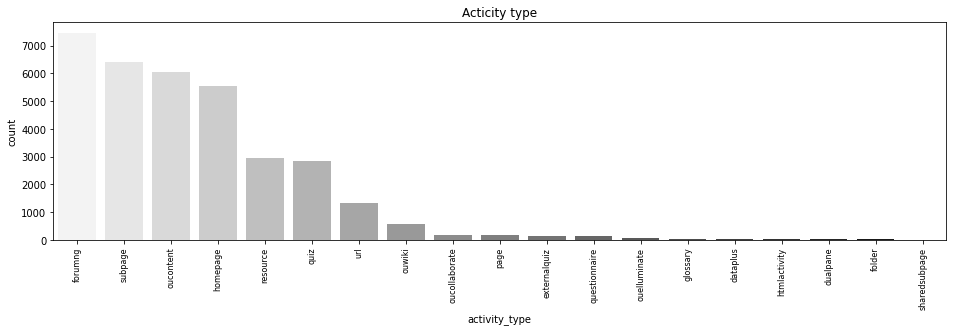

In [57]:
show_count_plot('activity_type' ,'Acticity type', df , 4)

In [58]:
df = pd.get_dummies(df, prefix='' , columns=['activity_type'])

In [59]:
df['code_module'] = le.fit_transform(df['code_module'])
df['code_presentation'] = le.fit_transform(df['code_presentation'])
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['highest_education'] = le.fit_transform(df['highest_education'])
df['imd_band'] = le.fit_transform(df['imd_band'])
df['age_band'] = le.fit_transform(df['age_band'])
df['disability'] = le.fit_transform(df['disability'])

In [60]:
data_frame = df.dropna(axis = 0)

In [61]:
data_frame.final_result.value_counts()

Distinction    8500
Pass           8500
Fail           8499
Withdrawn      8483
Name: final_result, dtype: int64

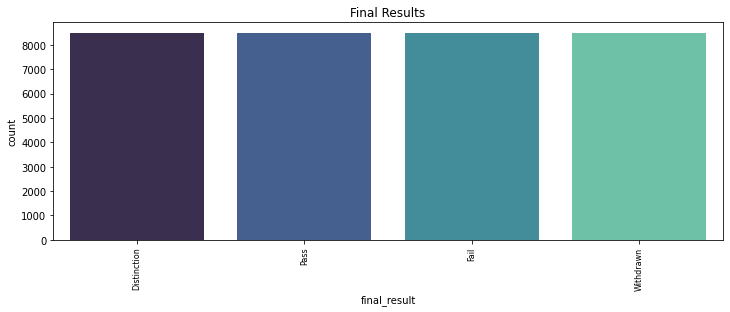

In [62]:
show_count_plot('final_result' , 'Final Results' , data_frame , 3)

In [63]:
def result_labeling(y):
  if y == 'Pass':
    return 1
  elif y == 'Distinction':
    return 1
  elif y == 'Fail':
    return 0
  elif y == 'Withdrawn':
    return 0

In [64]:
from tqdm import tqdm
tqdm.pandas()

In [65]:
data_frame['final_result'] = data_frame['final_result'].progress_apply(lambda y: result_labeling(y))

100%|██████████| 33982/33982 [00:00<00:00, 580056.24it/s]


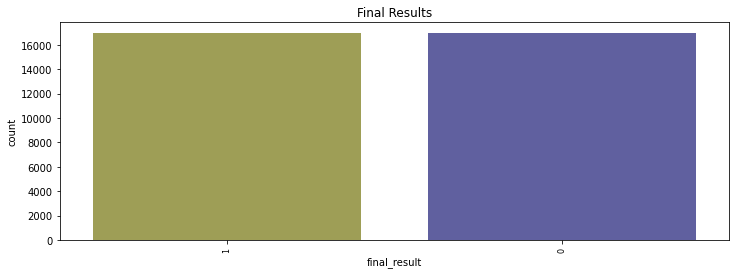

In [66]:
show_count_plot('final_result' , 'Final Results' , data_frame , 3)

In [67]:
# Here we are diffrentiating the dependent variable and independent variable
X = data_frame.drop(["final_result"],axis=1)
# X --> independemt
# Y --> dependemt
y = data_frame["final_result"]

Feature selection Method

---



---



In [68]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, y)

model = SelectFromModel(clf, prefit=True , max_features=19)
X_new = model.transform(X)

In [69]:
from sklearn.model_selection import train_test_split # For spliting the data into train test --> To verify the model accuracy
x_trn, x_tst, y_trn, y_tst = train_test_split(X_new,y, test_size=0.2, random_state=0)
#splitting data in test ,train in ratio 80:20 

Random Forest

---



---



In [70]:
from sklearn.metrics import confusion_matrix# Basic liberary for result showing
from sklearn.metrics import classification_report# Basic liberary for model building   
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0 , max_depth=50)
rfc.fit(x_trn, y_trn)
y_pred = rfc.predict(x_tst)

 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3416
           1       0.89      0.87      0.88      3381

    accuracy                           0.88      6797
   macro avg       0.88      0.88      0.88      6797
weighted avg       0.88      0.88      0.88      6797

 
  
Testing Accuracy   : 0.88
Testing precision  : 0.88
Testing recall     : 0.88
Testing f1score    : 0.88
  


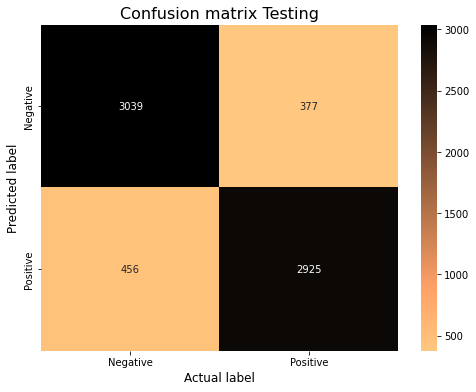

In [72]:
report_generator(y_tst , y_pred)

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13566
           1       1.00      1.00      1.00     13619

    accuracy                           1.00     27185
   macro avg       1.00      1.00      1.00     27185
weighted avg       1.00      1.00      1.00     27185

 
  
Testing Accuracy   : 1.0
Testing precision  : 1.0
Testing recall     : 1.0
Testing f1score    : 1.0
  


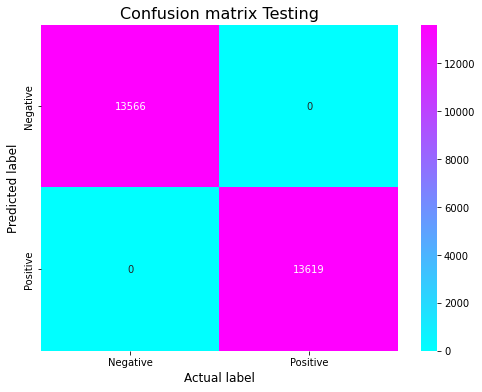

In [73]:
y_predict = rfc.predict(x_trn)
report_generator(y_trn , y_predict)

Naive bayes

---



---



In [74]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB , MultinomialNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(x_trn, y_trn)
y_predic = gnb.predict(x_tst)

 
              precision    recall  f1-score   support

           0       0.59      0.36      0.45      3416
           1       0.53      0.74      0.62      3381

    accuracy                           0.55      6797
   macro avg       0.56      0.55      0.53      6797
weighted avg       0.56      0.55      0.53      6797

 
  
Testing Accuracy   : 0.55
Testing precision  : 0.56
Testing recall     : 0.55
Testing f1score    : 0.53
  


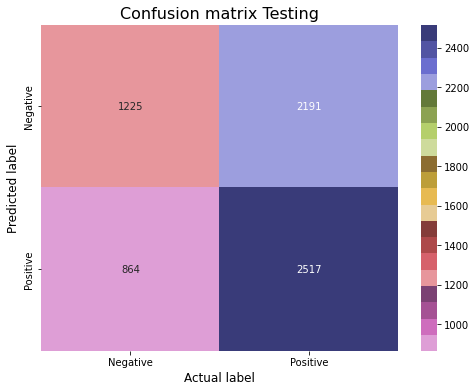

In [75]:
report_generator(y_tst , y_predic)

 
              precision    recall  f1-score   support

           0       0.58      0.35      0.44     13566
           1       0.54      0.75      0.63     13619

    accuracy                           0.55     27185
   macro avg       0.56      0.55      0.53     27185
weighted avg       0.56      0.55      0.53     27185

 
  
Testing Accuracy   : 0.55
Testing precision  : 0.56
Testing recall     : 0.55
Testing f1score    : 0.53
  


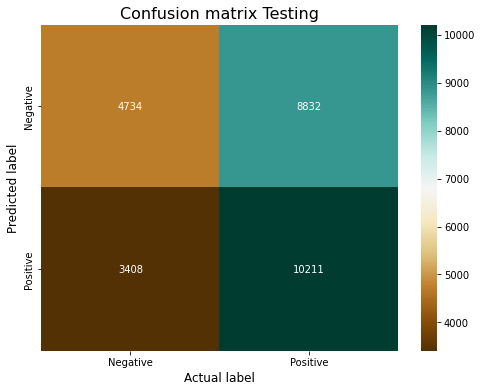

In [76]:
y_predict = gnb.predict(x_trn)
report_generator(y_trn , y_predict)